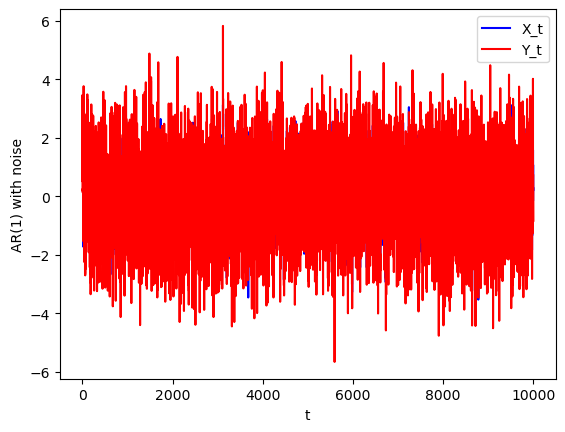

In [3]:
#This file contains the main experiments for the AR(1) model, corresponding to section 5.1 in the paper.
#The 'class_AR1.py' file is required for code excution
import numpy as np
import matplotlib.pyplot as plt
import time
from class_AR1 import AR1

def RMSE(thetalist,theta_true):
    rmselist=(np.mean((thetalist-theta_true[:,None])**2,axis=0))**.5
    return(rmselist)


#AR1 model
T=10000
phi=0.7
sigmax=0.7
sigmay=1
sigma0=(1-phi**2)**-0.5*sigmax
theta=np.array([phi,sigmax,sigmay])

np.random.seed(0)#1
X_true=[np.random.normal(0,sigma0)]
for t in range(T-1):   
    X_true.append(X_true[-1]*phi+np.random.normal(0,sigmax))
Y=X_true+np.random.normal(0,sigmay,T)
plt.plot(X_true,color='b',label='X_t')
plt.plot(Y,color='r',label='Y_t')
plt.xlabel("t")
plt.ylabel("AR(1) with noise")
plt.legend()    
N=1000
phi0=.5
sigmax0=.5
sigmay0=.7
theta0=np.array([phi0,sigmax0,sigmay0])
c1=0.0001#c1*T=1
c2=0.05
A=100
alpha=1
gamma=1/6
S=20
model=AR1(Y)

In [4]:
#This cell is just to give theta_mle=np.array([0.66825, 0.739  , 0.9575 ]), and requires package 'particles' from N.Chopins
# The rest of the cells should still work without excuting this cell
from particles import state_space_models as ssm 
from particles import kalman as km
num_grids=5
phi_test=np.linspace(0.663,0.67,num_grids)
sx_test=np.linspace(0.736,0.748,num_grids)
sy_test=np.linspace(.95,.96,num_grids)

l=np.zeros([num_grids,num_grids,num_grids])
for i in range(num_grids):
    for j in range(num_grids):
        for k in range(num_grids):
            ssm=km.LinearGauss(rho=phi_test[i], sigmaX=sx_test[j], sigmaY=sy_test[k], mu0=0,sigma0=(1-phi_test[i]**2)**-0.5*sx_test[j])
            kf = km.Kalman(ssm=ssm, data=Y)
            kf.filter()
            l[i][j][k]=np.sum(kf.logpyt)
index=np.where(l==l.max())
phi_mle=phi_test[index[0]]
sx_mle=sx_test[index[1]]
sy_mle=sy_test[index[2]]
theta_mle=np.array([phi_mle[0],sx_mle[0],sy_mle[0]])
theta_mle #theta_mle=np.array([0.66825, 0.739  , 0.9575 ])

array([0.66825, 0.739  , 0.9575 ])

In [5]:
#Our SemiGA algorithm
theta0=np.array([.5,.5,.7])
theta_mle=np.array([0.66825, 0.739  , 0.9575 ])
REP=1
N=1000
r1=.5
r2=1
S=20

comp_time=0
renews=0
thetas_seeds=[[]]*S
thetas_last=np.zeros([S,3])
for s in range(S):
    np.random.seed(s)
    start=time.perf_counter()
    model.onGA2(theta0,c1,A,alpha,N,r1,r2,REP)
    end=time.perf_counter()
    comp_time+=end-start
    renews+=model.k1
    thetas_seeds[s]=model.thetalist
    thetas_last[s]=model.thetalist[-1]

thetas_seeds=np.array(thetas_seeds)
#rmselist=RMSE(thetas_seeds[-1],theta_mle)
#rmselist=RMSE(thetas_last[:,None],theta_mle)
rmselist=RMSE(thetas_last[:,:,None],theta_mle)

print('time=',comp_time, 'RMSE=',rmselist,'renews=',renews)
#plt.plot(model.thetalist)

theta0=np.array([phi0,sigmax0,sigmay0])

time= 106.88190009980462 RMSE= [[0.01545747]
 [0.02134268]
 [0.01429889]] renews= 393


In [6]:
#online_ON^2
theta0=np.array([.5,.5,.7])
REP=1
S=20
N=35
comp_time=0
thetas_seeds=np.zeros([S,3,1+(T-1)*REP])
for s in range(S):
    np.random.seed(s)
    start=time.perf_counter()
    model.onON2(theta0,c1,A,alpha,N,REP)
    end=time.perf_counter()
    comp_time+=end-start
    thetas_seeds[s]=model.thetalist.T

rmselist=RMSE(thetas_seeds,theta_mle)
print('time=',comp_time, 'RMSE=',rmselist[:,-1])
#plt.plot(rmselist.T)
#plt.plot(model.thetalist);


time= 116.47790689999238 RMSE= [0.02721346 0.03586984 0.02336082]


In [8]:
#NGA
N=1000
I=3
S=20
comp_time=0
thetas_seeds=np.zeros([S,3,I+1])
for s in range(S):
    np.random.seed(s)
    start=time.perf_counter()
    model.NGA1(theta0,c1,c2,A,alpha,gamma,I,N)
    end=time.perf_counter()
    comp_time+=end-start
    thetas_seeds[s]=model.thetalist.T

rmselist=RMSE(thetas_seeds,theta_mle)
print('time=',comp_time, 'RMSE=',rmselist[:,-1])
#plt.plot(rmselist.T)
#plt.plot(model.thetalist);


time= 144.07259120000526 RMSE= [0.18776822 0.22930517 0.23669055]


In [9]:
#FGA
N=1000
I=5
S=20
comp_time=0
thetas_seeds=np.zeros([S,3,I+1])
for s in range(S):
    np.random.seed(s)
    start=time.perf_counter()
    model.FGA1(theta0,c1,A,alpha,I,N)
    #model.FGA2(theta0,I,N)
    end=time.perf_counter()
    comp_time+=end-start
    thetas_seeds[s]=model.thetalist.T

rmselist=RMSE(thetas_seeds,theta_mle)
print('time=',comp_time, 'RMSE=',rmselist[:,-1])
#plt.plot(rmselist.T)
#plt.plot(model.thetalist);

time= 127.90664439985994 RMSE= [0.15120817 0.19806121 0.21706923]


In [12]:
#Our AdaptGA algorithm
N=1000
S=20
I=5#35
r=.2
inner_K=50

comp_time=0
thetas_seeds=[[]]*S
thetas_last=np.zeros([S,3])
for s in range(S):
    np.random.seed(s)
    start=time.perf_counter()
    model.AGA1(theta0,c1,A,alpha,I,N,r,inner_K)
    end=time.perf_counter()
    comp_time+=end-start
    #thetas_seeds[s]=model.thetalist
    thetas_last[s]=model.thetalist[-1]
    #print(model.thetalist[-1])

#rmselist=RMSE(thetas_seeds[-1],theta_mle)
rmselist=RMSE(thetas_last[:,:,None],theta_mle)

thetas_seeds=np.array(thetas_seeds)
print('time=',comp_time, 'RMSE=',rmselist)
#plt.plot(model.thetalist);
#plt.plot(thetas_seeds.T);

time= 133.24423220020253 RMSE= [[0.03976022]
 [0.05520955]
 [0.04274614]]
